# Orthogonality
## Demonstrate that different frequency sinuisoids are orthogonal

In [1]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.1f}'.format

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
#For Actual signal, pick random phase and freq
f_min = 1
f_max = 10

phi_act = np.random.rand(1)*np.pi
f_act = np.random.randint(f_min,f_max)

In [3]:
Npts = 2**12 # Number of pts
# end time
Tf = np.ceil(5/f_act) #arbitrary multiple of T
t = np.linspace(0,Tf,Npts)

In [4]:
y_act = np.cos(2*np.pi*f_act*t + 0*phi_act)
y_act_shifted = np.cos(2*np.pi*f_act*t + phi_act)

In [5]:
# Freq range to test over
test_freqs = np.arange(f_min,f_max)
Nf = len(test_freqs)

# Create time responses at several freq values
test_ftn = []
for kk in test_freqs:
    test_ftn.append(np.cos(2*np.pi*kk*t))
    test_ftn.append(np.sin(2*np.pi*kk*t))

In [6]:
table = []
table.append(test_freqs)
table.append((np.sum(test_ftn[0:2*Nf:2]*y_act,axis=1))/Npts)
table.append((np.sum(test_ftn[1:2*Nf:2]*y_act,axis=1))/Npts)
df = pd.DataFrame(table, index=['Test Freqs', 'Similarity: cos','Similarity: sin'])
df[df.isna()]=0
max_similarity = np.max(np.abs(df[1:].to_numpy()))
print('\n\nCompare similarities\n')
print(df.T)



Compare similarities

   Test Freqs  Similarity: cos  Similarity: sin
0         1.0              0.5             -0.0
1         2.0              0.0             -0.0
2         3.0              0.0              0.0
3         4.0              0.0             -0.0
4         5.0              0.0              0.0
5         6.0              0.0              0.0
6         7.0              0.0             -0.0
7         8.0              0.0             -0.0
8         9.0              0.0              0.0


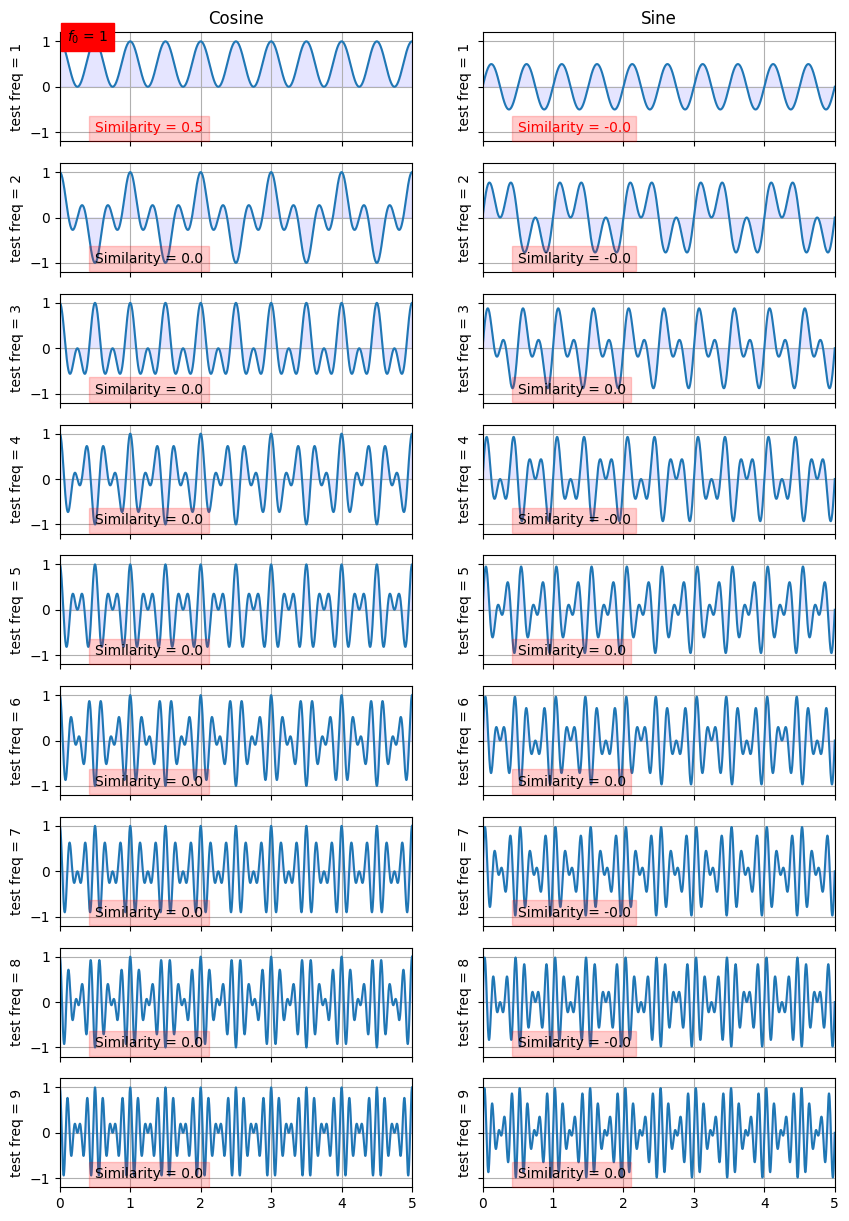

In [7]:
fig, axs = plt.subplots(Nf,2,figsize=(10, 15),sharex=True,sharey=True)
tt = axs[0,0].text(0.1,1,f'$f_0$ = '+str(f_act))
tt.set_bbox(dict(facecolor='red', alpha=1, edgecolor='red'))
axs[0,0].set_title('Cosine')
axs[0,1].set_title('Sine')
for kk in range(Nf):
    for ii in [0,1]:
        prod = np.transpose(test_ftn[2*kk+ii]*y_act)
        axs[kk,ii].plot(t,prod) 
        axs[kk,ii].fill_between(t,prod, 0, color='blue', alpha=.1)
        axs[kk,ii].set_ylabel(f"test freq = {test_freqs[kk]:1d}")
        axs[kk,ii].set_ylim(-1.2,1.2)
        axs[kk,ii].set_xlim(0,Tf)

    if abs(abs(df[kk][1]) - max_similarity) < 1e-3:
        clr = 'r'
    elif abs(abs(df[kk][2]) - max_similarity) < 1e-3:
        clr = 'g'
    else:
        clr='k'
    tt = axs[kk,0].text(.5,-1,f'Similarity = {df[kk][1]:,.1f}',color=clr)
    tt.set_bbox(dict(facecolor='red', alpha=.2, edgecolor='red'))
    tt = axs[kk,1].text(.5,-1,f'Similarity = {df[kk][2]:,.1f}',color=clr)
    tt.set_bbox(dict(facecolor='red', alpha=.2, edgecolor='red'))
plt.show()

## Repeat Analysis for Phase Shifted Actual Signal

In [8]:
def f(y_f, test_phi = 0):
    test_ftn = []
    for kk in test_freqs:
        test_ftn.append(np.cos(2*np.pi*kk*t + test_phi))
        test_ftn.append(np.sin(2*np.pi*kk*t + test_phi))
    
    table = []
    table.append(test_freqs)
    table.append((np.sum(test_ftn[0:2*Nf:2]*y_f,axis=1))/Npts)
    table.append((np.sum(test_ftn[1:2*Nf:2]*y_f,axis=1))/Npts)
    df = pd.DataFrame(table, index=['Test Freqs', 'Similarity: cos','Similarity: sin'])
    df[df.isna()] = 0
    max_similarity = np.max(np.abs(df[1:].to_numpy()))

    fig, axs = plt.subplots(Nf,2,figsize=(10, 15),sharex=True,sharey=True)
    tt = axs[0,0].text(0.1,1,f'$f_0$ = '+str(f_act))
    tt.set_bbox(dict(facecolor='red', alpha=1, edgecolor='red'))
    tt = axs[0,1].text(0.1,1,f'$\phi$ = {phi_act[0]:.2f}')
    tt.set_bbox(dict(facecolor='red', alpha=1, edgecolor='red'))
    axs[0,0].set_title('Cosine')
    axs[0,1].set_title('Sine')
    for kk in range(Nf):
        for ii in [0,1]:
            prod = np.transpose(test_ftn[2*kk+ii]*y_f)
            axs[kk,ii].plot(t,prod) 
            axs[kk,ii].fill_between(t,prod, 0, color='blue', alpha=.1)
            axs[kk,ii].set_ylabel(f"test freq = {test_freqs[kk]:1d}")
            axs[kk,ii].set_ylim(-1.2,1.2)
            axs[kk,ii].set_xlim(0,Tf)
    
        if abs(abs(df[kk][1]) - max_similarity) < 1e-3:
            clr = 'r'
        elif abs(abs(df[kk][2]) - max_similarity) < 1e-3:
            clr = 'g'
        else:
            clr='k'
        tt = axs[kk,0].text(.5,-1,f'Similarity = {df[kk][1]:,.1f}',color=clr)
        tt.set_bbox(dict(facecolor='red', alpha=.2, edgecolor='red'))
        tt = axs[kk,1].text(.5,-1,f'Similarity = {df[kk][2]:,.1f}',color=clr)
        tt.set_bbox(dict(facecolor='red', alpha=.2, edgecolor='red'))
    plt.show()

interactive_plot = interactive(f, {'manual': False}, y_f = fixed(y_act_shifted), test_phi = (-np.pi, np.pi, 0.1))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='test_phi', max=3.141592653589793, min=-3.14159265358…